In [4]:
import pandas as pd

In [26]:
df = pd.read_csv('/data/monthly_us_auto_sales.tsv', sep='\t')
df['Month'] = pd.to_datetime(df['Month'])
df = df[df['Month'] >= '2018-01-01']

In [28]:
df.head()

,Month,Total_Auto_Sales
0,2021-07-31,15.23M
1,2021-06-30,15.86M
2,2021-05-31,17.39M
3,2021-04-30,18.78M
4,2021-03-31,18.15M


In [30]:
df.Total_Auto_Sales = (df.Total_Auto_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
    df.Total_Auto_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
    .fillna(1)
    .replace(['K','M'], [10**3, 10**6]).astype(int))

In [31]:
df = df.set_index('Month')

In [ ]:
df.to_csv('/data/us_monthly_auto_sales.csv')

<AxesSubplot:xlabel='Month'>

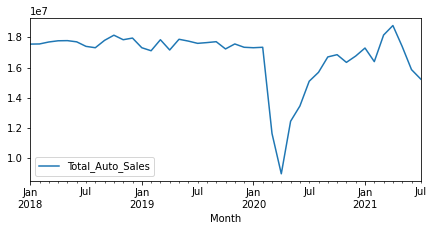

In [32]:
df.plot(figsize=(7,3))